In [70]:
from datetime import datetime, timedelta
from events import Events
import pandas as pd

events = Events()

df = pd.DataFrame(events.events,columns=["week", "category", "subject", "duration"])
df['duration_mins'] = df.duration.apply(lambda t: t.seconds//60)

In [124]:
categories = df.loc[df.week != 'Before'].loc[df.category != "Social"].category.unique()
categories

array(['Reading', 'Job', 'Study', 'Sport', 'Procrastinated', 'Info',
       'Timetable'], dtype=object)

In [96]:
df.loc[df.week == "Week 7"].sort_values('duration_mins', ascending=False)

,week,category,subject,duration,duration_mins
1,Week 7,Job,None,0 days 08:30:00,510
8,Week 7,Study,IADS,0 days 03:00:00,180
61,Week 7,Timetable,SESL2,0 days 03:00:00,180
6,Week 7,Reading,None,0 days 02:30:00,150
578,Week 7,Sport,None,0 days 01:24:51,84
577,Week 7,Sport,None,0 days 01:11:44,71
2,Week 7,Study,SNDA2,0 days 01:00:00,60
62,Week 7,Timetable,EM2b,0 days 01:00:00,60
0,Week 7,Reading,None,0 days 00:45:00,45
5,Week 7,Study,EM2b,0 days 00:45:00,45


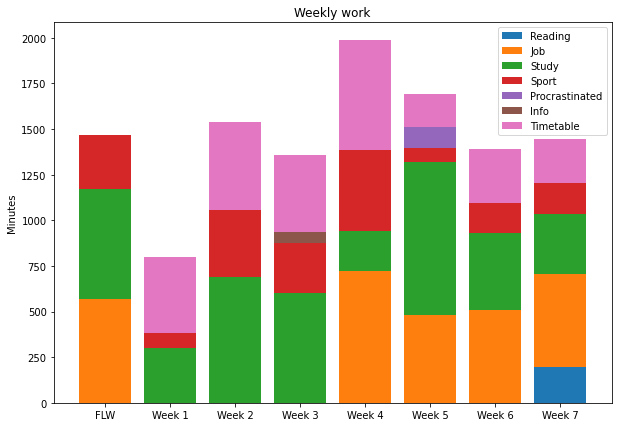

In [129]:
######
# WEEKLY BAR CHART
######

import numpy as np
import matplotlib.pyplot as plt
 
N = len(df.week.unique())-1
 
# study = np.array([totals[key]["Categories"]["Study"]//3600 for key in totals.keys()])
# timetable = np.array([totals[key]["Categories"]["Timetable"]//3600 for key in totals.keys()])
# social = np.array([totals[key]["Categories"]["Social"]//3600 for key in totals.keys()])
# sport = np.array([totals[key]["Categories"]["Sport"]//3600 for key in totals.keys()])
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
labels = []
bottom = np.zeros(N)
# print(bottom)

totals = df \
    .loc[df.week != "Before"] \
    .loc[df.category != "Social"] \
    .groupby(['category','week'])["duration_mins"].sum().unstack(fill_value=0).stack()

for c in categories:
    # print(c)
    # print(totals[c])
    p = plt.bar(ind, totals[c], bottom = bottom, label=c)
    # print(totals[c])
    bottom += totals[c]
    labels.append([p[0],c])
# p1 = plt.bar(ind, study, width)
# p2 = plt.bar(ind, timetable, width, bottom = study)
# p3 = plt.bar(ind, social, width, bottom = study+timetable)
# p4 = plt.bar(ind, sport, width, bottom = study+timetable+social)

 
plt.ylabel('Minutes')
plt.title('Weekly work')
plt.xticks(ind, totals['Study'].keys())

# plt.axhline(32*60)

# plt.legend((p1[0], p2[0], p3[0], p4[0]), ('study', 'timetable','social','sport'))
plt.legend()
 
plt.show()

In [128]:
totals["Social"]

KeyError: 'Social'

In [111]:
bottom

array([ 294.,  560.,  733., 1428., 1958., 2010., 2559., 3461.])

In [2]:
events.events

array([['Week 3', 'Sport', None, datetime.timedelta(seconds=379)],
       ['Week 3', 'Sport', None, datetime.timedelta(seconds=3946)],
       ['Week 3', 'Sport', None, datetime.timedelta(seconds=3600)],
       ['Week 3', 'Sport', None, datetime.timedelta(seconds=587)],
       ['Week 3', 'Sport', None, datetime.timedelta(seconds=3605)],
       ['Week 2', 'Sport', None, datetime.timedelta(seconds=6600)],
       ['Week 2', 'Sport', None, datetime.timedelta(seconds=4620)],
       ['Week 2', 'Sport', None, datetime.timedelta(seconds=3816)],
       ['Week 2', 'Sport', None, datetime.timedelta(seconds=4935)],
       ['Week 2', 'Sport', None, datetime.timedelta(seconds=1570)],
       ['Week 2', 'Sport', None, datetime.timedelta(seconds=691)],
       ['Week 1', 'Sport', None, datetime.timedelta(seconds=4840)],
       ['Before', 'Sport', None, datetime.timedelta(seconds=847)],
       ['Before', 'Sport', None, datetime.timedelta(seconds=5474)],
       ['Before', 'Sport', None, datetime.timedelta(